In [91]:
import numpy as np
import pandas as pd

# Series and Datetimeindex

 Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers. Let's call this Series s.
 

In [92]:
dti=pd.date_range(start="2015-01-01",end="2015-12-12",freq="B")
s=pd.Series(np.random.rand(len(dti)),index=dti)
s

2015-01-01    0.773482
2015-01-02    0.208308
2015-01-05    0.408567
2015-01-06    0.775946
2015-01-07    0.052942
                ...   
2015-12-07    0.832168
2015-12-08    0.419384
2015-12-09    0.027639
2015-12-10    0.057827
2015-12-11    0.796319
Freq: B, Length: 247, dtype: float64

In [93]:
#34. Find the sum of the values in s for every Wednesday.
s[s.index.weekday==2].sum()

24.118839971116678

In [94]:
#35. For each calendar month in s, find the mean of values.
s.resample("M").mean()

2015-01-31    0.558297
2015-02-28    0.468796
2015-03-31    0.544876
2015-04-30    0.563999
2015-05-31    0.531997
2015-06-30    0.674960
2015-07-31    0.467447
2015-08-31    0.466759
2015-09-30    0.544999
2015-10-31    0.569654
2015-11-30    0.573609
2015-12-31    0.453776
Freq: M, dtype: float64

In [95]:
"""36. For each group of four consecutive calendar months in s, find 
the date on which the highest value occurred."""
s.groupby(pd.Grouper(freq="4M")).idxmax()

2015-01-31   2015-01-29
2015-05-31   2015-04-28
2015-09-30   2015-07-21
2016-01-31   2015-11-20
Freq: 4M, dtype: datetime64[ns]

# Cleaning Data
Take this monstrosity as the DataFrame to use in the following puzzles:

In [96]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


38. Some values in the the FlightNumber column are missing (they are NaN). These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Modify df to fill in these missing numbers and make the column an integer column (instead of a float column)

In [97]:
df["FlightNumber"]=df["FlightNumber"].interpolate().astype(int)
#interpolate=>nan değerleri tahmin eder
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


The From_To column would be better as two separate columns! Split each string on the underscore delimiter _ to give a new temporary DataFrame called 'temp' with the correct values. Assign the correct column names 'From' and 'To' to this temporary DataFrame.

In [98]:
new_df=df["From_To"].str.split("_",expand=True)
new_df.columns=["From","To"]
new_df


,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


40. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame 'temp'. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

In [99]:
new_df["From"]=new_df["From"].str.capitalize()
new_df["To"]=new_df["To"].str.capitalize()
new_df

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


41. Delete the From_To column from 41. Delete the From_To column from df and attach the temporary DataFrame 'temp' from the previous questions.df and attach the temporary DataFrame from the previous questions.

In [100]:
df.join(new_df)

,From_To,FlightNumber,RecentDelays,Airline,From,To
0,LoNDon_paris,10045,"[23, 47]",KLM(!),London,Paris
1,MAdrid_miLAN,10055,[],<Air France> (12),Madrid,Milan
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,Budapest_PaRis,10075,[13],12. Air France,Budapest,Paris
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air""",Brussels,London


42. In the Airline column, you can see some extra puctuation and symbols have appeared around the airline names. Pull out just the airline name. E.g. '(British Airways. )' should become 'British Airways'.

In [101]:
df["Airline"]=df["Airline"].str.extract("([a-zA-Z\s]+)",expand=False).str.strip()

df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM
1,MAdrid_miLAN,10055,[],Air France
2,londON_StockhOlm,10065,"[24, 43, 87]",British Airways
3,Budapest_PaRis,10075,[13],Air France
4,Brussels_londOn,10085,"[67, 32]",Swiss Air


43. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.

Expand the Series of lists into a new DataFrame named 'delays', rename the columns 'delay_1', 'delay_2', etc. and replace the unwanted RecentDelays column in df with 'delays'.

In [102]:
# there are several ways to do this, but the following approach is possibly the simplest

delays = df['RecentDelays'].apply(pd.Series)

delays.columns = ['delay_{}'.format(n) for n in range(1, len(delays.columns)+1)]

df = df.drop('RecentDelays', axis=1).join(delays)

df

,From_To,FlightNumber,Airline,delay_1,delay_2,delay_3
0,LoNDon_paris,10045,KLM,23.0,47.0,NaN
1,MAdrid_miLAN,10055,Air France,NaN,NaN,NaN
2,londON_StockhOlm,10065,British Airways,24.0,43.0,87.0
3,Budapest_PaRis,10075,Air France,13.0,NaN,NaN
4,Brussels_londOn,10085,Swiss Air,67.0,32.0,NaN


## Using MultiIndexes
Go beyond flat DataFrames with additional index levels

44. Given the lists letters = ['A', 'B', 'C'] and numbers = list(range(10)), construct a MultiIndex object from the product of the two lists. Use it to index a Series of random numbers. Call this Series s.

In [103]:
letters=["A","B","C","D"]
numbers=list(range(10))
mi=pd.MultiIndex.from_product([letters,numbers])
s=pd.Series(np.random.rand(40),index=mi)

46. Select the labels 1, 3 and 6 from the second level of the MultiIndexed Series.

In [104]:
s.loc[:,[1,3,6]]

A  1    0.779204
   3    0.437157
   6    0.533269
B  1    0.787251
   3    0.287468
   6    0.950696
C  1    0.172477
   3    0.807681
   6    0.206439
D  1    0.009388
   3    0.296172
   6    0.222711
dtype: float64

47. Slice the Series s; slice up to label 'B' for the first level and from label 5 onwards for the second level.

In [106]:
s.loc[pd.IndexSlice[:"B",5]]

A  5    0.115133
B  5    0.647386
dtype: float64

<Axes: xlabel='xs', ylabel='ys'>

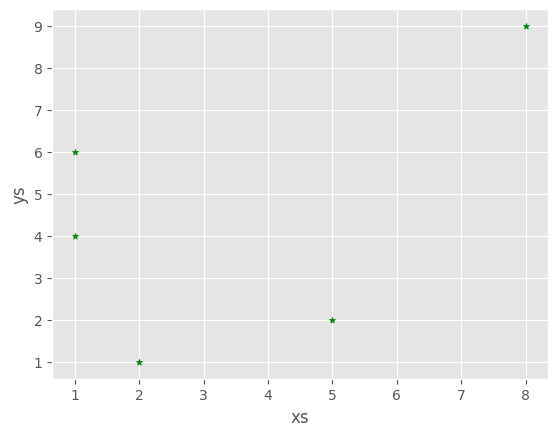

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})
df.plot.scatter("xs", "ys", color = "green", marker = "*")

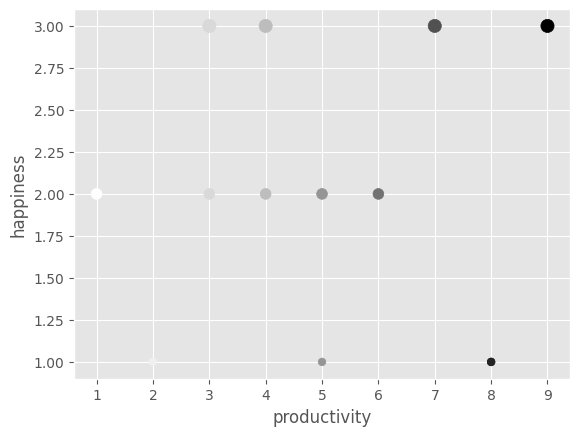

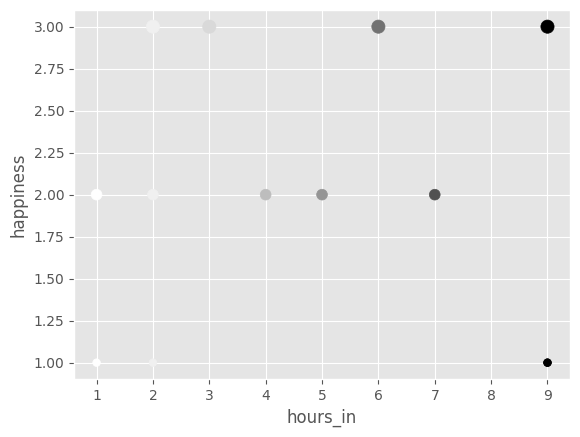

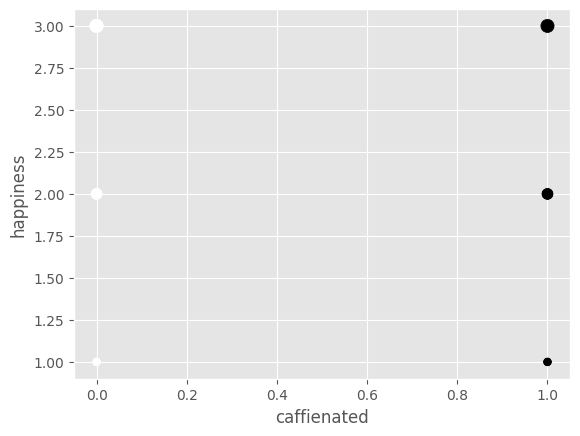

In [126]:
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})
#s=df["happiness"] c=["productivity","hours_in","caffienated"]

category=["productivity","hours_in","caffienated"]

for i in category:
    df.plot.scatter(i,"happiness",s=df["happiness"]*30,c=df[i])